# Binary classification with logistic regression

In [47]:
df = pd.read_pickle('data/spam.pickle')
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
print('Number of spam messages: %s' % df[df[0] == 'spam'][0].count())
print('Number of spam messages: %s' % df[df[0] == 'ham'][0].count())

Number of spam messages: 33
Number of spam messages: 167


In [49]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

X = df[1].values
y = df[0].values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
for i, prediction in enumerate(predictions[:5]):
    print('Predicted: %s, message: %s' % (prediction, X_test_raw[i]))

Predicted: ham, message: Hi frnd, which is best way to avoid missunderstding wit our beloved one's?
Predicted: ham, message: Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
Predicted: ham, message: What is the plural of the noun research?
Predicted: ham, message: I know! Grumpy old people. My mom was like you better not be lying. Then again I am always the one to play jokes...
Predicted: ham, message: Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!


# Binary classification perfromance metrics

Can be used to visualize true and false positives and nevatives.

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4 1]
 [2 3]]


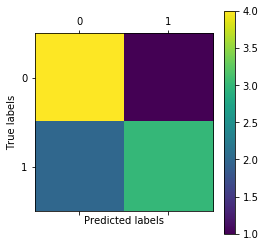

In [52]:
plt.matshow(confusion_matrix)
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Accuracy

Measures the fraction of classifier's predictions that are correct.

In [58]:
from sklearn.metrics import roc_curve, auc

X = df[1].values
y = df[0].values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print('Accuracies: %s' % scores)
print('Mean accuracies: %s' % np.mean(scores))

Accuracies: [0.83870968 0.86666667 0.86666667 0.86666667 0.86206897]
Mean accuracies: 0.8601557285873194


# Multi-class classification

In [85]:
df = pd.read_pickle('data/train.pickle')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X, y = df['Phrase'], df['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(solver='liblinear', multi_class='auto'))
])
parameters = {
    'vect__max_df': (0.25, 0.5),
    'vect__use_idf': (True, False),
    'clf__C': (0.1, 1, 10),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('t%s: %r' % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best score: 0.670
Best parameters set:
tclf__C: 1
tvect__max_df: 0.25
tvect__use_idf: True


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.2s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
